# Statistics

Chapter 11 of Python for Finance.

Hilpisch, Yves. Python for Finance: Analyze Big Financial Data. O'Reilly Media. Kindle Edition.

* Normality Tests
* Portfolio Theory

## Normality Tests
Applications of the normal distribution in finance. Starting with geometric Brownian motion:

Normal log returns 
    Log returns $\log\frac{S_t}{S_s} = \log S_t - \log S_s$ between two times 0 < s < t are normally distributed. Log-normal values At any time t > 0, the values $S_t$ are log-normally distributed.


In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: Module use of python35.dll conflicts with this version of Python.

In [2]:
python--version

NameError: name 'python' is not defined

In [2]:
# Define a function for geometric Brownian motion:

def gen_paths(S0, r, sigma, T, M, I):
    ''' Generates Monte Carlo paths for geometric Brownian motion
    
    Parameters
    ================
    S0: float. Initial stock price/index value
    r: float. Constant short rate
    sigma: float. constant volatility
    T: float. Final time horizon in years
    M: int. Number of time steps or intervals
    I: int. Number of paths to simulate
    
    Returns
    ================
    paths: ndarray, shape(M+1, I). Simulated paths
    '''
    
    dt = float(T)/M
    paths = np.zeros((M+1, I), np.float64)
    paths[0] = S0
    
    for t in range(1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean())/rand.std() #Moment matching to make the simulation closer to a "perfect Normal." See Ch. 10
        paths[t] = paths[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*rand)
    return paths
    

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I =250000

paths = gen_paths(S0,r, sigma, T, M, I)

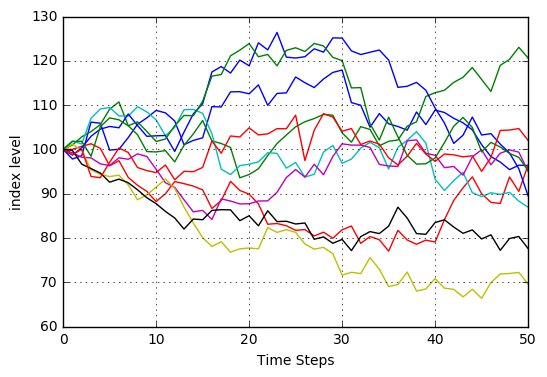

In [4]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('index level')

In [5]:
log_returns = np.log(paths[1:]/paths[0:-1])

In [6]:
paths[:,0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [7]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [8]:
def print_statistics(array):
    '''Prints selected statistics
    
    Parameters
    ==============
    array: ndarray. Object to generate statistics on
    '''
    
    sta = scs.describe(array)
    print('{:14s} {:15s}'.format('statistic','value'))
    print(30*"-")
    print('{:14s} {:15.5f}'.format('size',sta[0]))
    print('{:14s} {:15.5f}'.format('min',sta[1][0]))
    print('{:14s} {:15.5f}'.format('max',sta[1][1]))
    print('{:14s} {:15.5f}'.format('mean',sta[2]))
    print('{:14s} {:15.5f}'.format('std',np.sqrt(sta[3])))
    print('{:14s} {:15.5f}'.format('skew',sta[4]))
    print('{:14s} {:15.5f}'.format('kertosis',sta[5]))

In [9]:
print_statistics(log_returns.flatten())

statistic      value          
------------------------------
size            12500000.00000
min                   -0.15664
max                    0.15371
mean                   0.00060
std                    0.02828
skew                   0.00055
kertosis               0.00085


In [10]:
# Annualize by multiplying the mean and standard deviation by 50 and sqrt(50) respectively.
print('Annualized mean: {:5.4f}'.format(round(scs.describe(log_returns.flatten())[2]*50,3)))
print('Annualized standard deviation: {:4.3}'.format(round(scs.describe(log_returns.flatten())[3]*np.sqrt(50),4)))

Annualized mean: 0.0300
Annualized standard deviation: 0.0057


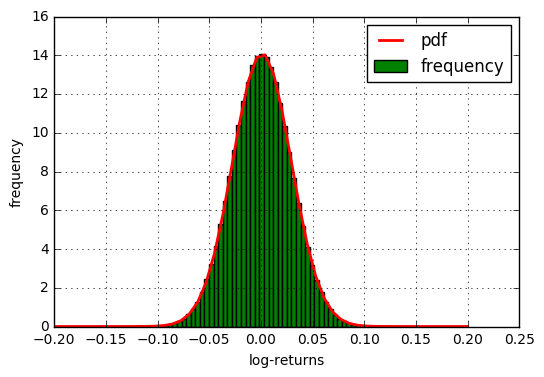

In [11]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency', color='green')
plt.grid(True)
plt.xlabel('log-returns')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)),'r', lw=2.0, label='pdf')
plt.legend()

Using quantile plots to test for normalcy:

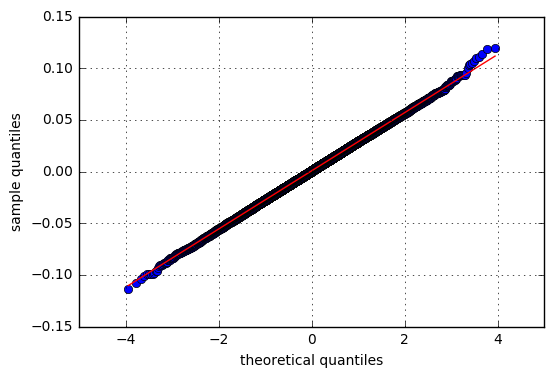

In [12]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [13]:
def normality_tests(arr):
    '''Tests for the normality of a given data set.
    
    Parameters:
    ====================
    array: ndarray. Object on which to generate statistics
    '''
    print("Skew of data set  {:14.3f}".format(scs.skew(arr))) 
    print("Skew test p-value {:14.3f}".format(scs.skewtest(arr)[1])) 
    print("Kurt of data set  {:14.3f}".format(scs.kurtosis(arr)))
    print("Kurt test p-value {:14.3f}".format(scs.kurtosistest(arr)[1])) 
    print("Norm test p-value {:14.3f}".format(scs.normaltest(arr)[1]))

In [14]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


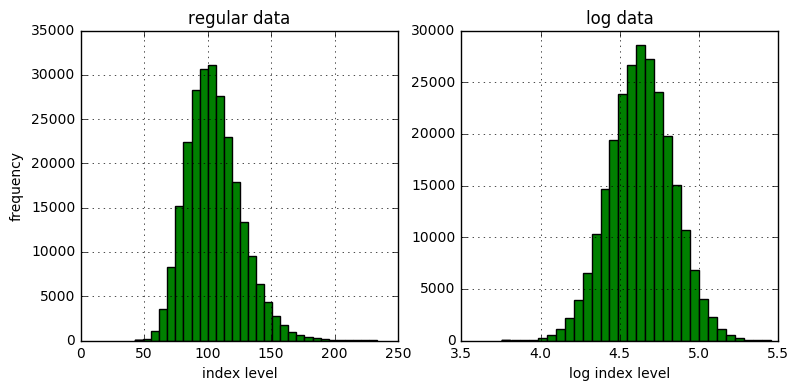

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize =(9, 4)) 
ax1.hist(paths[-1], bins = 30, color='green') 
ax1.grid(True)
ax1.set_xlabel('index level') 
ax1.set_ylabel('frequency')
ax1.set_title('regular data')

ax2.hist(np.log(paths[-1]), bins = 30, color='green') 
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [16]:
print_statistics(paths[-1])

statistic      value          
------------------------------
size              250000.00000
min                   42.74870
max                  233.58435
mean                 105.12645
std                   21.23174
skew                   0.61116
kertosis               0.65182


In [17]:
print_statistics(np.log(paths[-1]))

statistic      value          
------------------------------
size              250000.00000
min                    3.75534
max                    5.45354
mean                   4.63517
std                    0.19998
skew                  -0.00092
kertosis              -0.00327


In [18]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


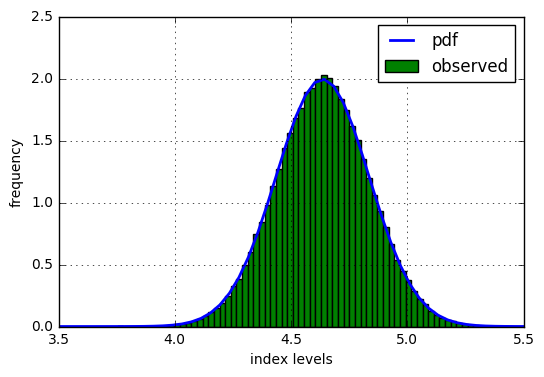

In [19]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed', color='green')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x,log_data.mean(), log_data.std()),'b',lw=2.0, label='pdf')
plt.legend()

In [20]:
paths[-1]

array([  96.33862377,  120.61147865,   96.51129499, ...,   93.23436617,
         98.77875561,  107.60096899])

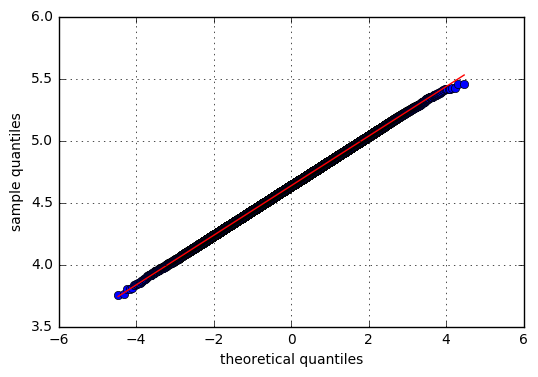

In [21]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## Real World Data

In [22]:
import pandas as pd
from pandas_datareader import data as web

In [23]:
web.DataReader("F", 'yahoo')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.554412
2010-01-05,10.45,11.24,10.40,10.96,215620200,9.120268
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.461446
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.702767
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.727731
2010-01-11,11.90,12.14,11.78,12.11,170626200,10.077230
2010-01-12,11.98,12.03,11.72,11.87,162995900,9.877516
2010-01-13,11.91,11.93,11.47,11.68,154527100,9.719410
2010-01-14,11.65,11.86,11.51,11.76,116531200,9.785981


In [24]:
symbols = ['^GDAXI', '^GSPC', 'YHOO', 'MSFT']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='1/1/2006')['Adj Close']

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2006-01-03 to 2016-11-23
Data columns (total 4 columns):
^GDAXI    2713 non-null float64
^GSPC     2713 non-null float64
YHOO      2713 non-null float64
MSFT      2713 non-null float64
dtypes: float64(4)
memory usage: 106.0 KB


In [25]:
data.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2006-01-03,5460.680176,1268.800049,40.910000,20.802884
2006-01-04,5523.620117,1273.459961,40.970001,20.903643
2006-01-05,5516.529785,1273.479980,41.529999,20.919144
2006-01-06,5536.319824,1285.449951,43.209999,20.857139
2006-01-09,5537.109863,1290.150024,43.419998,20.818386


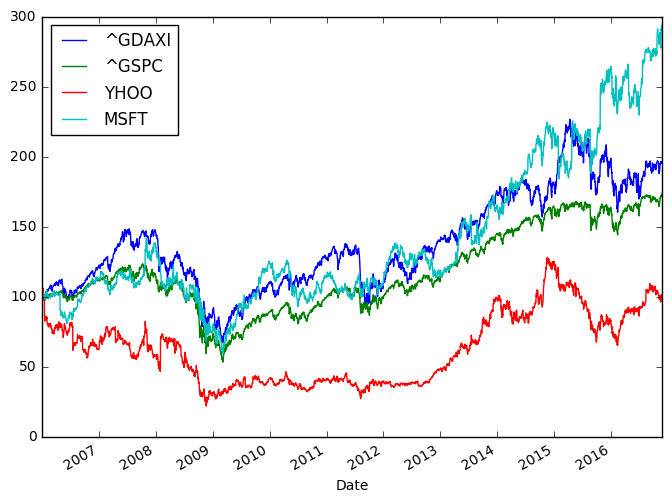

In [26]:
(data/data.ix[0]*100).plot(figsize=(8, 6))

In [27]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.001466,0.004832
2006-01-05,-0.001284,0.000016,0.013576,0.000741
2006-01-06,0.003581,0.009356,0.039656,-0.002968
2006-01-09,0.000143,0.003650,0.004848,-0.001860


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE818BFC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EE8220CBA8>]], dtype=object)

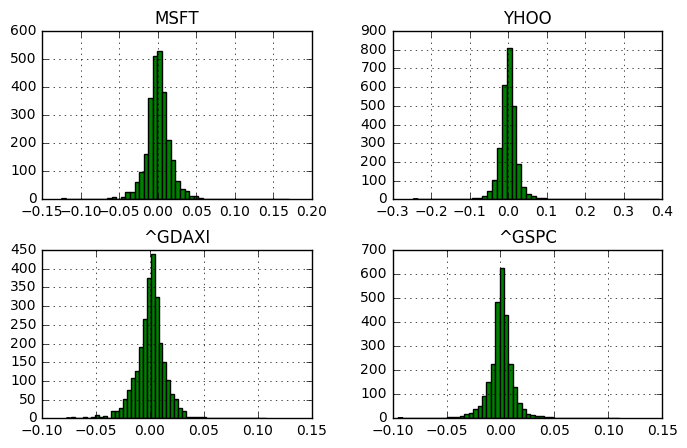

In [28]:
log_returns.hist(bins=50, figsize=(8,5), color='green')

### Statistics for time series data sets:

In [29]:
for sym in symbols:
    print("\nResults for symbol {}".format(sym))
    print(30*"-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
statistic      value          
------------------------------
size                2712.00000
min                   -0.07739
max                    0.10797
mean                   0.00025
std                    0.01456
skew                  -0.04755
kertosis               5.54477

Results for symbol ^GSPC
------------------------------
statistic      value          
------------------------------
size                2712.00000
min                   -0.09470
max                    0.10957
mean                   0.00020
std                    0.01286
skew                  -0.32546
kertosis              10.36401

Results for symbol YHOO
------------------------------
statistic      value          
------------------------------
size                2712.00000
min                   -0.24636
max                    0.39182
mean                   0.00000
std                    0.02496
skew                   0.50776
kertosis              3

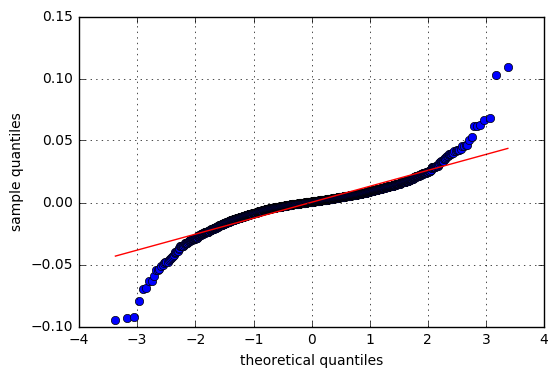

In [30]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [31]:
#Formal normality tests:
for sym in symbols:
    print("\nResults for symbol {}".format(sym))
    print(32*"-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)    


Results for symbol ^GDAXI
--------------------------------
Skew of data set          -0.048
Skew test p-value          0.311
Kurt of data set           5.545
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
--------------------------------
Skew of data set          -0.325
Skew test p-value          0.000
Kurt of data set          10.364
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol YHOO
--------------------------------
Skew of data set           0.508
Skew test p-value          0.000
Kurt of data set          31.407
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set           0.069
Skew test p-value          0.144
Kurt of data set           9.993
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

In [32]:
import numpy as np 
import pandas as pd 
import pandas.io.data as web 
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\tttri\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [33]:
symbols = ['AAPL','MSFT','YHOO','DB','GLD']
noa = len(symbols)

In [34]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start = '1/1/2006', end='11/1/2016')['Adj Close']

data.head()

,AAPL,MSFT,YHOO,DB,GLD
Date,,,,,
2006-01-03,9.726565,20.802884,40.910000,77.421792,53.119999
2006-01-04,9.755191,20.903643,40.970001,78.900795,53.299999
2006-01-05,9.678420,20.919144,41.529999,78.527153,52.340000
2006-01-06,9.928252,20.857139,43.209999,79.990584,53.720001
2006-01-09,9.895722,20.818386,43.419998,79.601369,54.599998


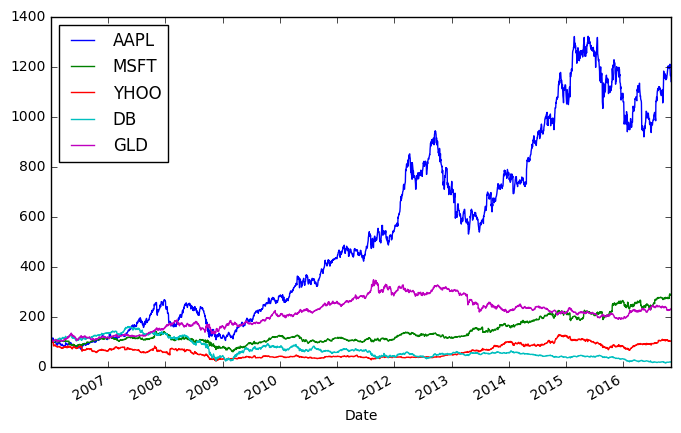

In [35]:
(data/data.ix[0]*100).plot(figsize=(8,5))

In [36]:
rets = np.log(data/data.shift(1))
rets.mean()*252

AAPL    0.224920
MSFT    0.096954
YHOO    0.000944
DB     -0.158503
GLD     0.077387
dtype: float64

In [37]:
rets.cov()*252

,AAPL,MSFT,YHOO,DB,GLD
AAPL,0.113292,0.040821,0.044459,0.070824,-0.001055
MSFT,0.040821,0.077149,0.037204,0.067243,0.000032
YHOO,0.044459,0.037204,0.155909,0.076897,-0.001681
DB,0.070824,0.067243,0.076897,0.238123,0.003377
GLD,-0.001055,0.000032,-0.001681,0.003377,0.040951


In [38]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [39]:
sum(weights)

1.0

### Expected Portfolio Return
$ \mu_p = E(\sum_I w_i r_i) $
$ = \sum_I w_tE(r_i)$
$ = \sum_I w_i \mu_i $
$ = w^T \mu $

In [40]:
np.sum(rets.mean()*weights)*252 # expected portfolio return

0.03657511340422548

In [41]:
np.dot(weights.T, np.dot(rets.cov()*252,weights)) # expected portfolio variance

0.034701695207478234

In [42]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252,weights))) # expected portfolio standard deviation

0.18628391022167812

In [43]:
prets = []
pvols = []

for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252,weights))))

prets = np.array(prets)
pvols = np.array(pvols)

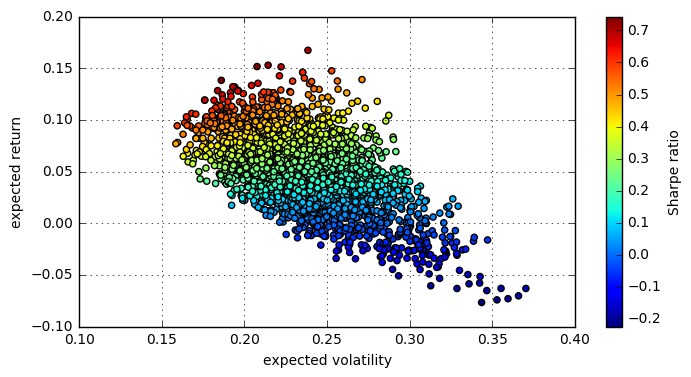

In [44]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c=prets/pvols, marker = 'o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [45]:
def statistics(weights): 
    ''' Returns portfolio statistics. 
    Parameters = = = = = = = = = = 
    weights : array-like weights for different securities in portfolio 
    
    Returns = = = = = = =
    pret : float expected portfolio return 
    pvol : float expected portfolio volatility 
    pret / pvol : float Sharpe ratio for rf = 0 ''' 
    
    weights = np.array(weights) 
    pret = np.sum(rets.mean() * weights) * 252 
    pvol = np.sqrt(np.dot(weights.T, np.dot( rets.cov() * 252, weights))) 

    return np.array([ pret, pvol, pret / pvol])

In [46]:
import scipy.optimize as sco

In [47]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [48]:
cons = ({'type':'eq','fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(noa))

In [49]:
noa*[1./noa]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [50]:
%%time
opts = sco.minimize(min_func_sharpe, noa*[1./noa], method='SLSQP',bounds=bnds, constraints=cons)

Wall time: 90.2 ms


In [51]:
opts

     fun: -0.777492808101378
     jac: array([  6.66677952e-05,  -1.45219266e-04,   4.74136524e-01,
         1.67040068e+00,  -4.77880239e-05,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  4.67812952e-01,   5.89504361e-02,   3.85650713e-16,
         1.46356451e-15,   4.73236612e-01])

In [52]:
opts['x'].round(3)

array([ 0.468,  0.059,  0.   ,  0.   ,  0.473])

In [53]:
statistics(opts['x']).round(3)
# 1st element is expected return
# 2nd element is volatility
# 3rd element is Sharpe ratio

array([ 0.148,  0.19 ,  0.777])

In [54]:
def min_func_variance(weights):
    return statistics(weights)[1]**2

In [55]:
optv = sco.minimize(min_func_variance, noa*[1. / noa,],
                    method = 'SLSQP', bounds = bnds, constraints=cons)
optv

     fun: 0.024135964042161007
     jac: array([ 0.04807034,  0.04851489,  0.04811046,  0.06078312,  0.04823993,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.10817854,  0.21957879,  0.077459  ,  0.        ,  0.59478368])

In [56]:
optv['x'].round(3)

array([ 0.108,  0.22 ,  0.077,  0.   ,  0.595])

In [57]:
statistics(optv['x']).round(3)

array([ 0.092,  0.155,  0.59 ])

In [58]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, 
       {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in weights)

In [59]:
def min_func_port(weights):
    return statistics(weights)[1]

In [70]:
%%time
trets = np.linspace(0.0, 0.2, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, 
            {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = sco.minimize(min_func_port, noa * [1. / noa,],
                       method='SLSQP',
                       bounds = bnds,
                       constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 5.28 s


In [71]:
tret = 0.5
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, 
            {'type':'eq', 'fun': lambda x: np.sum(x)-1})
sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds,constraints=cons)['fun']

0.33658816228855853

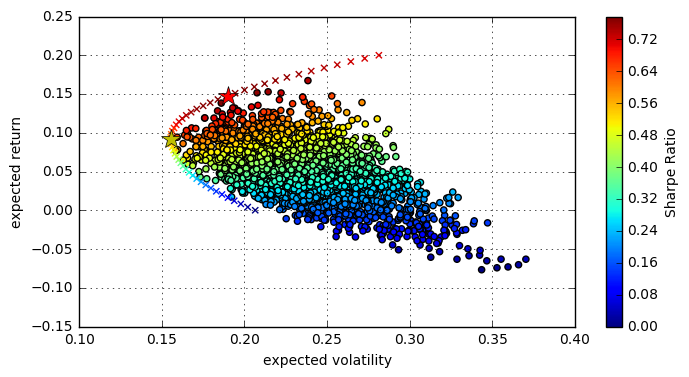

In [72]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o') #random portfolio composition
plt.scatter(tvols, trets, c=trets / tvols, marker='x') #efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0) #portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0) #minimum variance portolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe Ratio')



### Capital Market Line

In [73]:
import scipy.interpolate as sci

In [74]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [76]:
tck = sci.splrep(evols, erets)

In [77]:
def f(x):
    '''Efficient frontier function (splines approximation).'''
    return sci.splev(x, tck, der=0)

def df(x):
    '''First derivative of efficient frontier function'''
    return sci.splev(x, tck, der=1)

In [78]:
def equations(p, rf = 0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] -f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [79]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [80]:
opt

array([ 0.01      ,  0.72564423,  0.19631155])

In [81]:
np.round(equations(opt),6)

array([ 0., -0.,  0.])

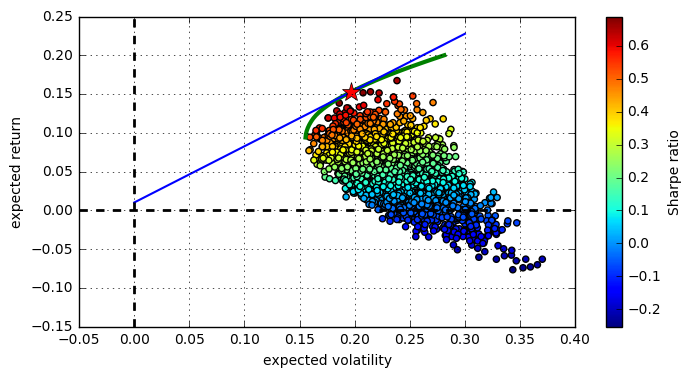

In [84]:
plt.figure(figsize = (8,4))
plt.scatter(pvols, prets, c=(prets - 0.01)/pvols, marker = 'o') # random portfolio composition
plt.plot(evols, erets, 'g', lw=3.0) #efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5) #capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=14) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw = 2.0)
plt.axvline(0, color='k', ls='--', lw = 2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')